In [61]:
import pandas as pd
import geopandas as gpd
from census import Census
import matplotlib.pyplot as plt
import contextily as ctx
pd.options.display.max_columns =200
import numpy as np
import mapclassify as mc

In [5]:
# import svi
svi = gpd.read_file("data/svi/SVI2018_US_tract.geojson")

In [4]:
# import demand model outputs
demand_svi = pd.read_csv("data/30_census_tract_demand_SVI.csv")
demand_hotspot = pd.read_csv("data/30_census_tract_hot_spot_demand_census_tract.csv")

In [9]:
## calculating state by state percentile rank for tract svi
## replacing -999 with nan
svi = svi.replace(-999,np.nan)

## state percentile calculations for each theme
svi['RPL_ThemesStates'] = svi.groupby('STATE')['SPL_THEMES'].rank(pct=True)
svi['RPL_Theme1States'] = svi.groupby('STATE')['SPL_THEME1'].rank(pct=True)
svi['RPL_Theme2States'] = svi.groupby('STATE')['SPL_THEME2'].rank(pct=True)
svi['RPL_Theme3States'] = svi.groupby('STATE')['SPL_THEME3'].rank(pct=True)
svi['RPL_Theme4States'] = svi.groupby('STATE')['SPL_THEME4'].rank(pct=True)


In [13]:
demand_svi["per_coverage_svi"] = demand_svi["percentage"]
demand_svi["demand_svi"]= demand_svi["demand_covered"]

demand_hotspot["per_coverage_hotspot"] = demand_hotspot["percentage"]
demand_hotspot["demand_hotspot"]= demand_hotspot["demand_covered"]


In [27]:
# creating FIPS column as string type
demand_hotspot['FIPS'] = demand_hotspot['Census Tract FIPS'].astype('str').str.pad(width=11,side='left',fillchar='0')
demand_svi['FIPS'] = demand_svi['Census Tract FIPS'].astype('str').str.pad(width=11,side='left',fillchar='0')

In [32]:
## joining the coverage results
coverage_results = svi.merge(demand_svi[['FIPS','per_coverage_svi','demand_svi']], 
                             how="left",on="FIPS")

coverage_results_merge = coverage_results.merge(demand_hotspot[['FIPS','per_coverage_hotspot','demand_hotspot']], 
                             how="left",on="FIPS")

In [37]:
keep_columns = ['FIPS','STCNTY','STATE','COUNTY','E_TOTPOP','RPL_ThemesStates','RPL_Theme1States',
                'RPL_Theme1States','RPL_Theme1States','RPL_Theme1States',
                'per_coverage_svi','demand_svi','per_coverage_hotspot','demand_hotspot',
                'geometry']
coverage = coverage_results_merge[keep_columns]

In [40]:
coverage.to_file("data_processing/coverage.geojson",driver='GeoJSON')

In [43]:
coverage_3857 = coverage.to_crs("EPSG:3857")

In [44]:
coverage_3857.to_file("data_processing/coverage_3857.geojson",driver='GeoJSON')

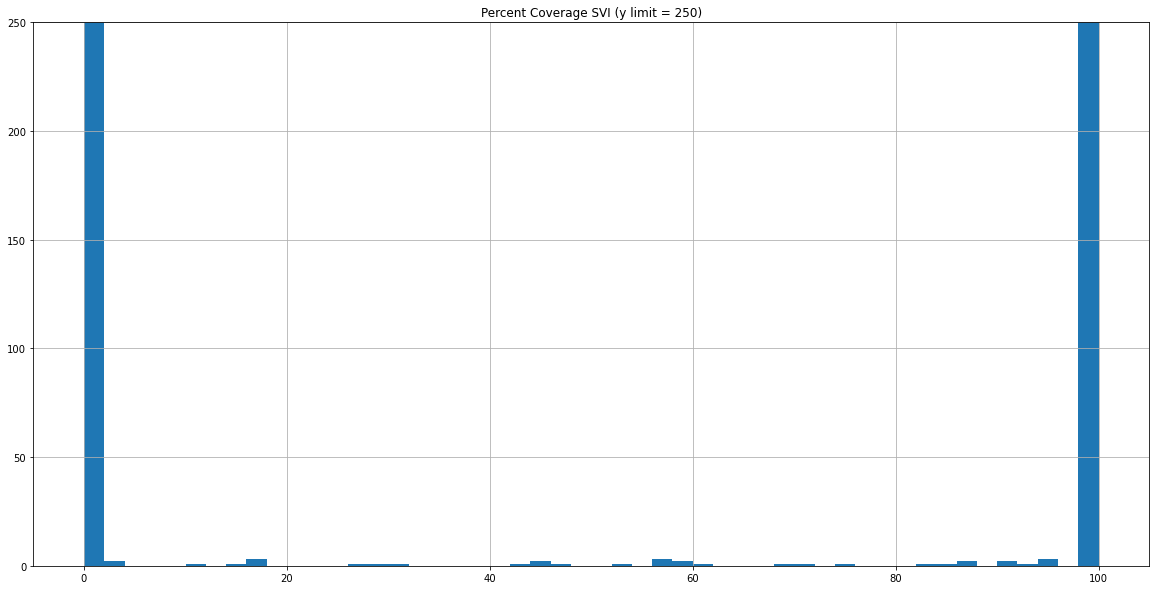

In [92]:
fig,ax=plt.subplots(figsize=(20,10))
coverage_3857['per_coverage_svi'].hist(ax=ax,bins=50)
ax.set_ylim([0,250])
ax.set_title("Percent Coverage SVI (y limit = 250)")
plt.show()

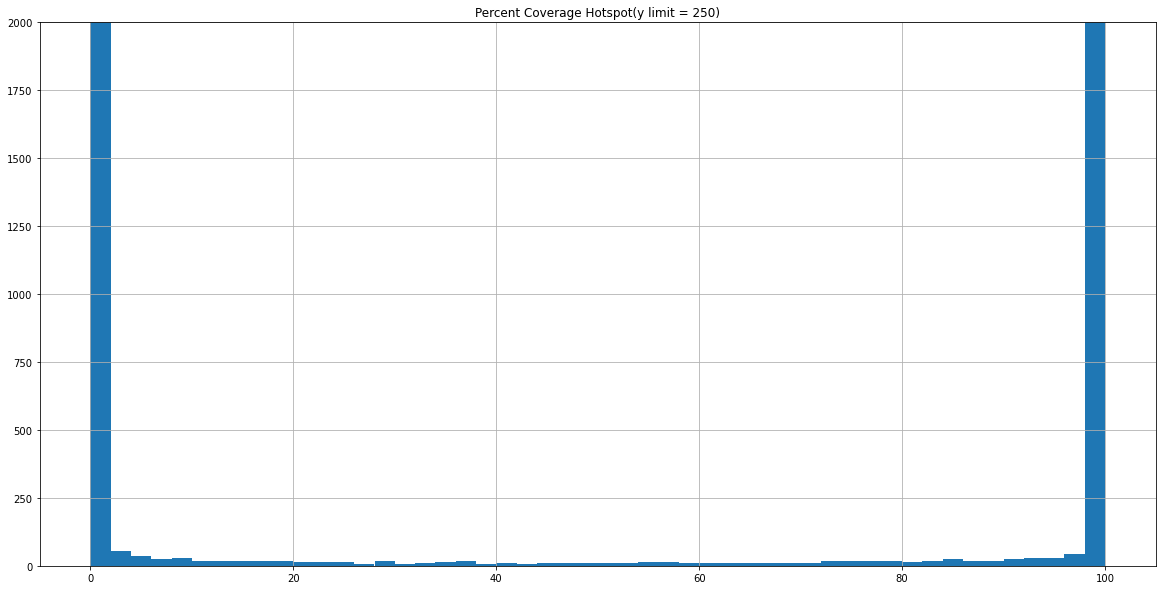

In [93]:
fig,ax=plt.subplots(figsize=(20,10))
coverage_3857['per_coverage_hotspot'].hist(ax=ax,bins=50)
ax.set_ylim([0,2000])
ax.set_title("Percent Coverage Hotspot(y limit = 250)")
plt.show()

In [63]:
cal = coverage_3857['per_coverage_svi']
bins=[0,20,40,60,80,99,100]
ud = mc.UserDefined(cal,bins)

In [79]:
lower_view = gpd.read_file("data/lower_48.geojson")
lower_view = lower_view.to_crs("EPSG:3857")

In [82]:
lower_view = gpd.read_file("data/lower_48.geojson")
lower_view = lower_view.to_crs("EPSG:3857")
lower48_xlim = ([lower_view.total_bounds[0],lower_view.total_bounds[2]])
lower48_ylim = ([lower_view.total_bounds[1],lower_view.total_bounds[3]])


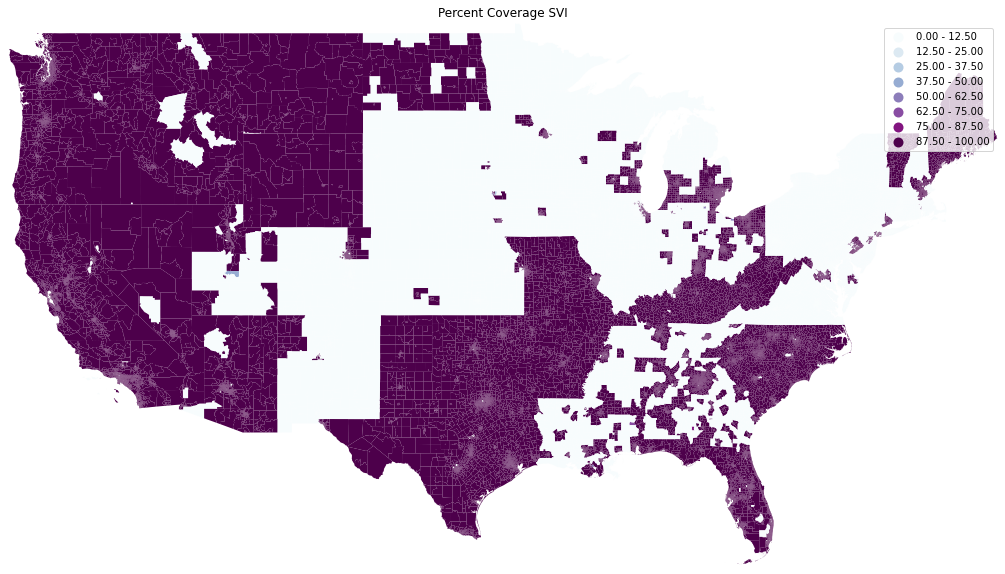

In [86]:
fig, ax = plt.subplots(figsize=(20,10))
coverage_3857.plot(ax=ax, column='per_coverage_svi', legend=True,cmap="BuPu",scheme='EqualInterval',k=8)
ax.set_xlim(lower48_xlim)
ax.set_ylim(lower48_ylim)
ax.set_title("Percent Coverage SVI")
ax.set_axis_off()


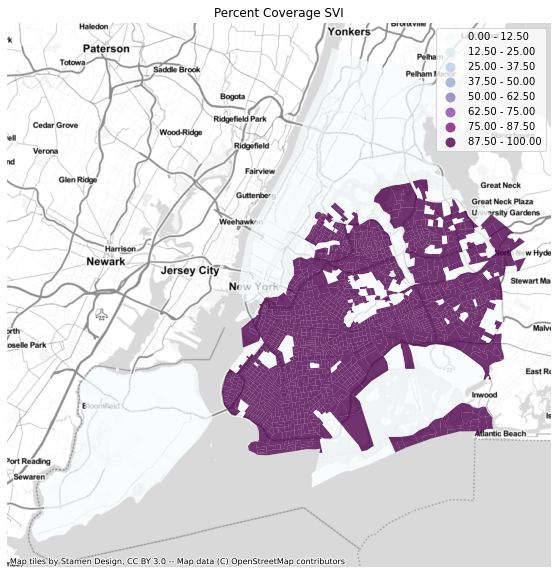

In [87]:
fig, ax = plt.subplots(figsize=(20,10))
coverage_3857[((coverage_3857['STCNTY']=='36061')|
                   (coverage_3857['STCNTY']=='36005')|
                   (coverage_3857['STCNTY']=='36085')|
                   (coverage_3857['STCNTY']=='36081')|
                  (coverage_3857['STCNTY']=='36047'))].plot(ax=ax, 
                                                            column='per_coverage_svi', 
                                                            legend=True,cmap="BuPu",scheme='EqualInterval',k=8,
                                                           alpha=.8)
ctx.add_basemap(ax, crs=coverage_3857.crs.to_string(),source=ctx.providers.Stamen.TonerLite)
ax.set_title("Percent Coverage SVI")
ax.set_axis_off()



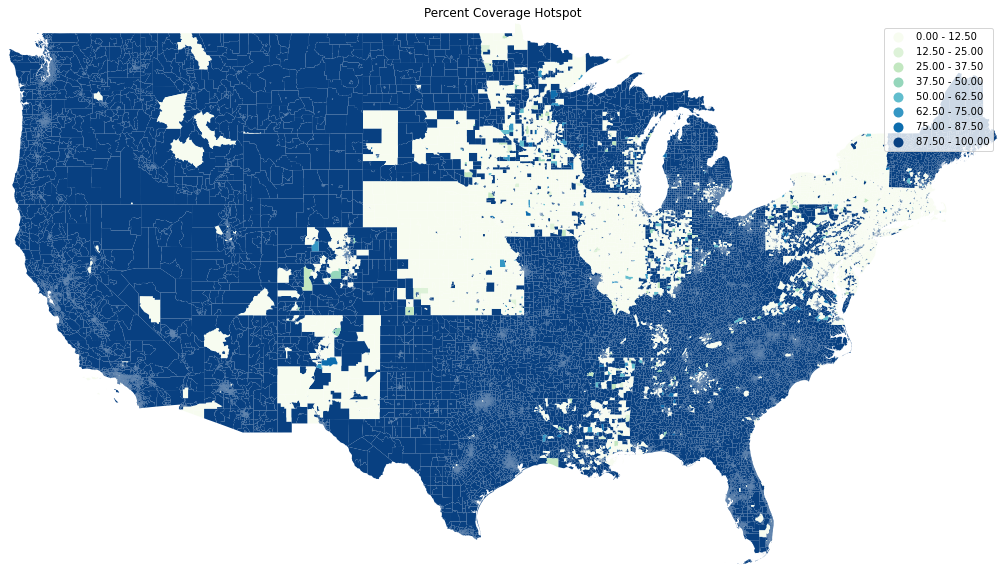

In [95]:
fig, ax = plt.subplots(figsize=(20,10))
coverage_3857.plot(ax=ax, column='per_coverage_hotspot', legend=True,cmap="GnBu",scheme='EqualInterval',k=8)
ax.set_xlim(lower48_xlim)
ax.set_ylim(lower48_ylim)
ax.set_title("Percent Coverage Hotspot")
ax.set_axis_off()


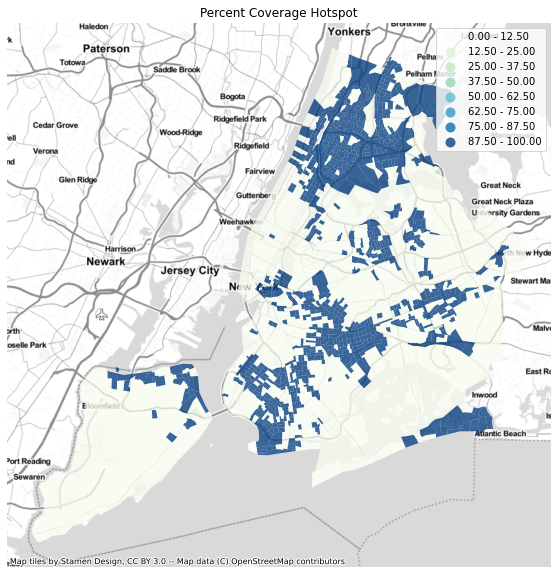

In [97]:
fig, ax = plt.subplots(figsize=(20,10))
coverage_3857[((coverage_3857['STCNTY']=='36061')|
                   (coverage_3857['STCNTY']=='36005')|
                   (coverage_3857['STCNTY']=='36085')|
                   (coverage_3857['STCNTY']=='36081')|
                  (coverage_3857['STCNTY']=='36047'))].plot(ax=ax, 
                                                            column='per_coverage_hotspot', 
                                                            legend=True,cmap="GnBu",scheme='EqualInterval',k=8,
                                                           alpha=.8)
ctx.add_basemap(ax, crs=coverage_3857.crs.to_string(),source=ctx.providers.Stamen.TonerLite)
ax.set_title("Percent Coverage Hotspot")
ax.set_axis_off()

